In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

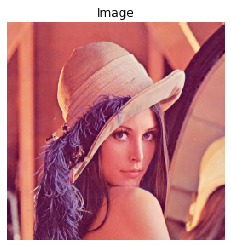

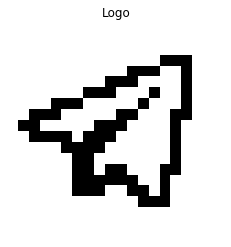

In [3]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 256
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show1(my_image.image, 'Image', 4)
ImageUtil.show1(my_logo.logo, 'Logo', 4)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 31.934682827043638


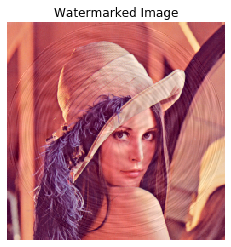

In [4]:
# Watermarker
riw = RIW(image_size, logo_size, 40, 0.5, 16)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

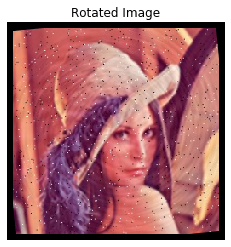

In [5]:
# Attack

attacked_image = np.copy(w_image.image)
attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
attacked_image = Attacker.attackJPG(attacked_image, 90)
attacked_image = Attacker.attackRotate(attacked_image, 5)
attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)

a_image = Image(attacked_image, w_image.image_size)

ImageUtil.show1(a_image.image, 'Rotated Image')

'Transform PCET: [####################] 100.0%'

BER = 11.25%


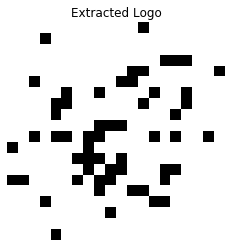

In [6]:
logo_extracted = riw.extract(a_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

# Testing

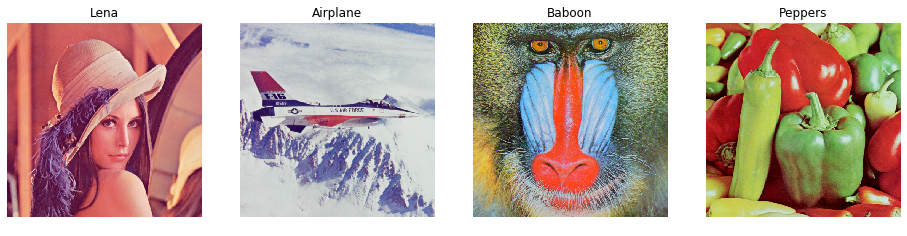

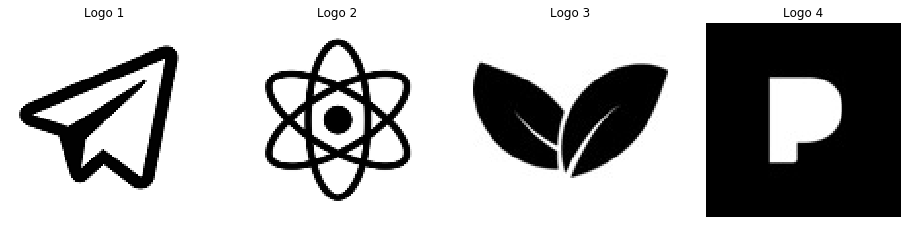

In [7]:
# Load image and logo

img_1 = cv2.imread('./assets/lena.png')
img_2 = cv2.imread('./assets/airplane.png')
img_3 = cv2.imread('./assets/baboon.png')
img_4 = cv2.imread('./assets/peppers.png')

logo_1 = cv2.imread('./assets/paperplane.png', 0)
logo_2 = cv2.imread('./assets/atom.png', 0)
logo_3 = cv2.imread('./assets/leaf.png', 0)
logo_4 = cv2.imread('./assets/p.png', 0)

image_logo_pairs = [
    (img_4, logo_4),
    (img_3, logo_3),
    (img_2, logo_2),
    (img_1, logo_1),
]

ImageUtil.show([[img_1, img_2, img_3, img_4]], [['Lena', 'Airplane', 'Baboon', 'Peppers']])
ImageUtil.show([[logo_1, logo_2, logo_3, logo_4]], [['Logo 1', 'Logo 2', 'Logo 3', 'Logo 4']])

In [8]:
n = 256
g = 20
p = 2 * g
d = 0.5
step = 24

# ImageUtil.show([[test_image.image, test_logo.logo]], [['Image', 'Logo']])

In [9]:
table_headers = ['N', 'G', 'P', 'D', 'PSNR', 'BER']

def multiple_attack(image):
    attacked_image = np.copy(image)
    attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
    attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
    attacked_image = Attacker.attackJPG(attacked_image, 90)
    attacked_image = Attacker.attackRotate(attacked_image, 5)
    attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)
    return attacked_image

In [10]:
def test_q_step(image, logo):
    test_d = []
    for dd in [0.25, 0.5, 0.75, 1]:

        # Initialize
        test_image = Image(image, n)
        test_logo = Logo(logo, g)

        # Create Watermarker
        temp_riw = RIW(n, g, 2 * g, dd, step)

        # Embed
        img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
        watermarked_image = Image.copy(test_image)
        watermarked_image.set_y(img_y_watermarked)

        # Calculate PSNR
        psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)

        # Attack
        attacked_image = Image(multiple_attack(watermarked_image.image), n)

        # Extract
        logo_extracted = temp_riw.extract(attacked_image.get_y())

        # Calculate BER
        ber = ImageUtil.ber(test_logo.logo, logo_extracted)

        test_d.append((n, g, p, dd, psnr, ber))

    print(tabulate(test_d, headers=table_headers))

In [ ]:
for (image, logo) in image_logo_pairs:
    print('\n==============================\n')
    test_q_step(image, logo)

In [11]:
def test_logo_size(image, logo):
    test_g = []
    for gg in [12, 20, 28, 36]:

        # Initialize
        test_image = Image(image, n)
        test_logo = Logo(logo, gg)

        # Create Watermarker
        temp_riw = RIW(n, gg, 2 * gg, d, step)

        # Embed
        img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
        watermarked_image = Image.copy(test_image)
        watermarked_image.set_y(img_y_watermarked)

        # Calculate PSNR
        psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)

        # Attack
        attacked_image = Image(multiple_attack(watermarked_image.image), n)

        # Extract
        logo_extracted = temp_riw.extract(attacked_image.get_y())

        # Calculate BER
        ber = ImageUtil.ber(test_logo.logo, logo_extracted)

        test_g.append((n, gg, p, d, psnr, ber))

    print(tabulate(test_g, headers=table_headers))

In [12]:
for (image, logo) in image_logo_pairs:
    print('\n==============================\n')
    test_logo_size(image, logo)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR       BER
---  ---  ---  ---  -------  --------
256   12   40  0.5  33.8181  0.166667
256   20   40  0.5  30.8255  0.41
256   28   40  0.5  29.9525  0.649235
256   36   40  0.5  29.549   0.768519




'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR       BER
---  ---  ---  ---  -------  --------
256   12   40  0.5  33.9562  0.131944
256   20   40  0.5  31.0698  0.185
256   28   40  0.5  30.1956  0.195153
256   36   40  0.5  29.7246  0.246914




'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR        BER
---  ---  ---  ---  -------  ---------
256   12   40  0.5  34.3583  0.0902778
256   20   40  0.5  31.7485  0.115
256   28   40  0.5  30.7155  0.140306
256   36   40  0.5  30.1087  0.17284




'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR       BER
---  ---  ---  ---  -------  --------
256   12   40  0.5  34.3063  0.118056
256   20   40  0.5  31.9347  0.1275
256   28   40  0.5  30.7843  0.121173
256   36   40  0.5  30.1692  0.141975


In [44]:
def test_image_size(image, logo):
    test_n = []
    for nn in [128, 256, 384, 512]:

        # Initialize
        test_image = Image(image, nn)
        test_logo = Logo(logo, g)

        # Create Watermarker
        temp_riw = RIW(nn, g, 2 * g, d, step)

        # Embed
        img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
        watermarked_image = Image.copy(test_image)
        watermarked_image.set_y(img_y_watermarked)

        # Calculate PSNR
        psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)

        # Attack
        attacked_image = Image(multiple_attack(watermarked_image.image), nn)

        # Extract
        logo_extracted = temp_riw.extract(attacked_image.get_y())

        # Calculate BER
        ber = ImageUtil.ber(test_logo.logo, logo_extracted)

        test_n.append((nn, g, p, d, psnr, ber))

    print(tabulate(test_n, headers=table_headers))

In [ ]:
for (image, logo) in image_logo_pairs:
    print('\n==============================\n')
    test_image_size(image, logo)

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [###################-] 95.8%'